# Distribuciones de Datos: Revelando los Patrones Ocultos

## Introducción

Las distribuciones de datos son una herramienta fundamental en el análisis estadístico, ya que permiten comprender cómo se dispersan o agrupan los valores de una variable. Al estudiar las distribuciones, es posible descubrir patrones, tendencias y características clave que a menudo permanecen ocultas en los datos sin procesar.

Las distribuciones de datos cuantitativos se pueden explorar utilizando histogramas y curvas de distribución. Estas herramientas ayudan a visualizar y analizar la estructura subyacente de los datos, permitiendo tomar decisiones y hacer predicciones más allá de los datos observados.

Los histogramas brindan una representación gráfica de la distribución de los datos, mientras que las curvas de distribución permiten modelar y estimar la densidad de probabilidad de manera más suave y continua. Además, las distribuciones tienen aplicaciones en el campo de la Inteligencia Artificial Generativa.

A medida que se avanza en la exploración de las distribuciones de datos, se descubre cómo estas pueden revelar información valiosa y ayudar a comprender mejor el mundo que nos rodea a través de los datos.

In [34]:
import pandas as pd
import numpy as np

np.random.seed(0)

n = 100
id = range(1, n + 1)
height = np.random.normal(172, 8, n)
bmi = 26 + np.random.normal(0, 2.5, n)
weight = bmi * ((height/100) ** 2)

data = pd.DataFrame({'ID': id, 'Height': height, 'Weight': weight, 'BMI': bmi})
data.sort_values(by=['Height'],inplace=True,ignore_index=True)

## Histogramas: Representando la Distribución de los Datos

Los histogramas son una herramienta gráfica que permite visualizar cómo se distribuyen los valores de una variable. Cuando se tiene un conjunto de datos, como el peso de un grupo de personas, cada medida individual puede parecer poco informativa por sí sola, pero al organizar estos datos en un histograma, se obtiene una visión clara de la distribución.

Para crear un histograma, se divide el rango de valores en intervalos o "bins" y se cuenta cuántas medidas caen en cada uno de ellos. Luego, se representan estas cantidades con barras verticales, donde la altura de cada barra refleja la frecuencia de las medidas en ese intervalo específico.

Veamos un ejemplo concreto con los datos de peso de 100 personas. Primero, se agrupan los datos en bins y se representan con puntos apilados verticalmente.

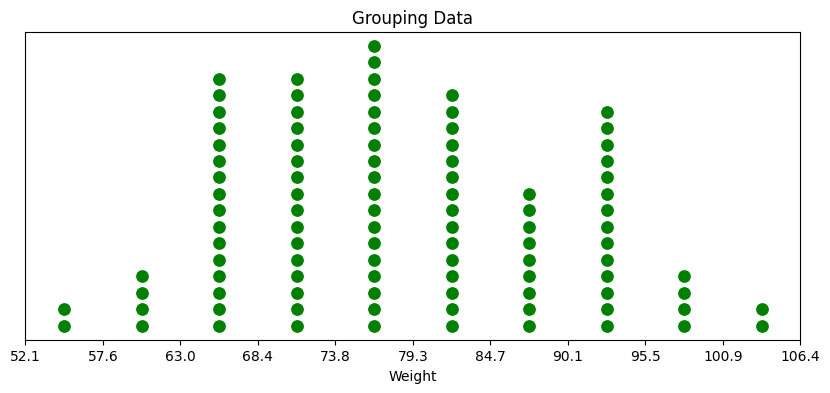

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

bin_count = 10
counts, bin_edges = np.histogram(data['Weight'], bins=bin_count)
hist_data = pd.DataFrame()

for i in range(bin_count):
    bin_center = (bin_edges[i] + bin_edges[i + 1]) / 2
    bin_data = pd.DataFrame({'x': [bin_center] * counts[i], 'y': range(counts[i])})
    hist_data = pd.concat([hist_data, bin_data], ignore_index=True)

plt.figure(figsize=(10, 4))
sns.scatterplot(x=hist_data['x'], y=hist_data['y'], s=100, color="green", marker='o', legend=False)

plt.xlabel("Weight")
plt.title("Grouping Data")
plt.xticks(ticks=bin_edges, labels=np.round(bin_edges, 1))
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

A continuación, se transforman estos puntos apilados en barras, obteniendo el histograma final. Cada barra representa la frecuencia de las medidas en un intervalo específico de peso.

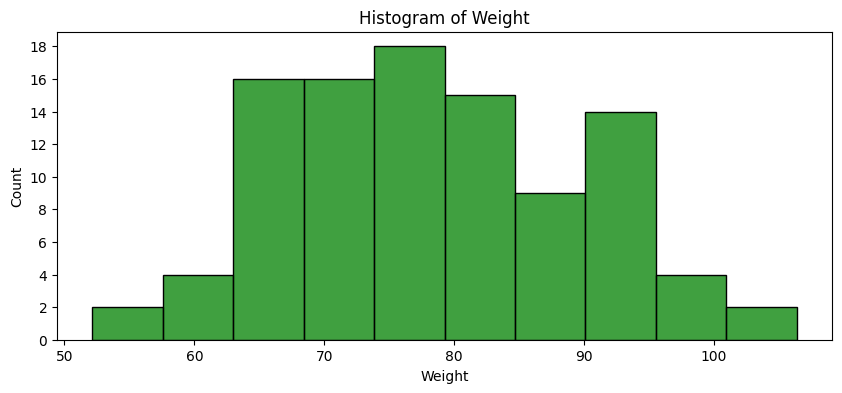

In [36]:
plt.figure(figsize=(10, 4))
histplot = sns.histplot(data['Weight'], bins=bin_count, color="green")
max_count = int(max(histplot.patches, key=lambda p: p.get_height()).get_height())
plt.yticks(ticks=range(0, max_count+1, 2))

plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight")
plt.show()

El histograma permite identificar rápidamente los patrones y características clave de la distribución de los datos de peso. Se puede observar que la mayoría de las medidas se concentran en el rango de 60 a 70 kg, mientras que hay menos medidas en los rangos de peso más bajos y más altos.

Los histogramas son una herramienta poderosa para analizar y comprender la estructura subyacente de los datos. Permiten identificar la centralidad, la dispersión y la forma de la distribución, lo cual es fundamental para tomar decisiones informadas basadas en los datos.

## Formas de Distribución: Simétrica, Asimétrica, Bimodal y Uniforme


Las distribuciones de datos pueden adoptar diversas formas, cada una con características distintivas que brindan información valiosa sobre el comportamiento de los datos. Algunas de las formas más comunes son la simétrica, asimétrica, bimodal y uniforme.

Una distribución simétrica es aquella en la que los datos se distribuyen de manera equilibrada a ambos lados del centro. Si se traza una línea vertical en el medio del histograma, se observa que cada lado es una imagen espejo del otro. Un ejemplo clásico de una distribución simétrica es la distribución normal o gaussiana, que tiene forma de campana.

Por otro lado, las distribuciones asimétricas se caracterizan por tener una cola más larga hacia un lado. En una distribución asimétrica a la izquierda, la cola se extiende hacia la izquierda, mientras que la mayoría de los datos se concentran en el lado derecho. En contraste, una distribución asimétrica a la derecha tiene una cola que se extiende hacia la derecha, con la mayoría de los datos concentrados en el lado izquierdo.

Las distribuciones bimodales son aquellas que tienen dos picos o modas distintas, lo que indica la presencia de dos grupos o subpoblaciones diferentes en los datos. Por ejemplo, en una distribución de alturas, se podría observar un pico para las alturas de los hombres y otro pico para las alturas de las mujeres.

Por último, una distribución uniforme es aquella en la que todos los valores dentro de un rango determinado tienen la misma probabilidad de ocurrir. En un histograma, esto se vería como barras de igual altura para cada intervalo. Un ejemplo clásico de una distribución uniforme es el lanzamiento de un dado justo, donde cada número del 1 al 6 tiene la misma probabilidad de salir.

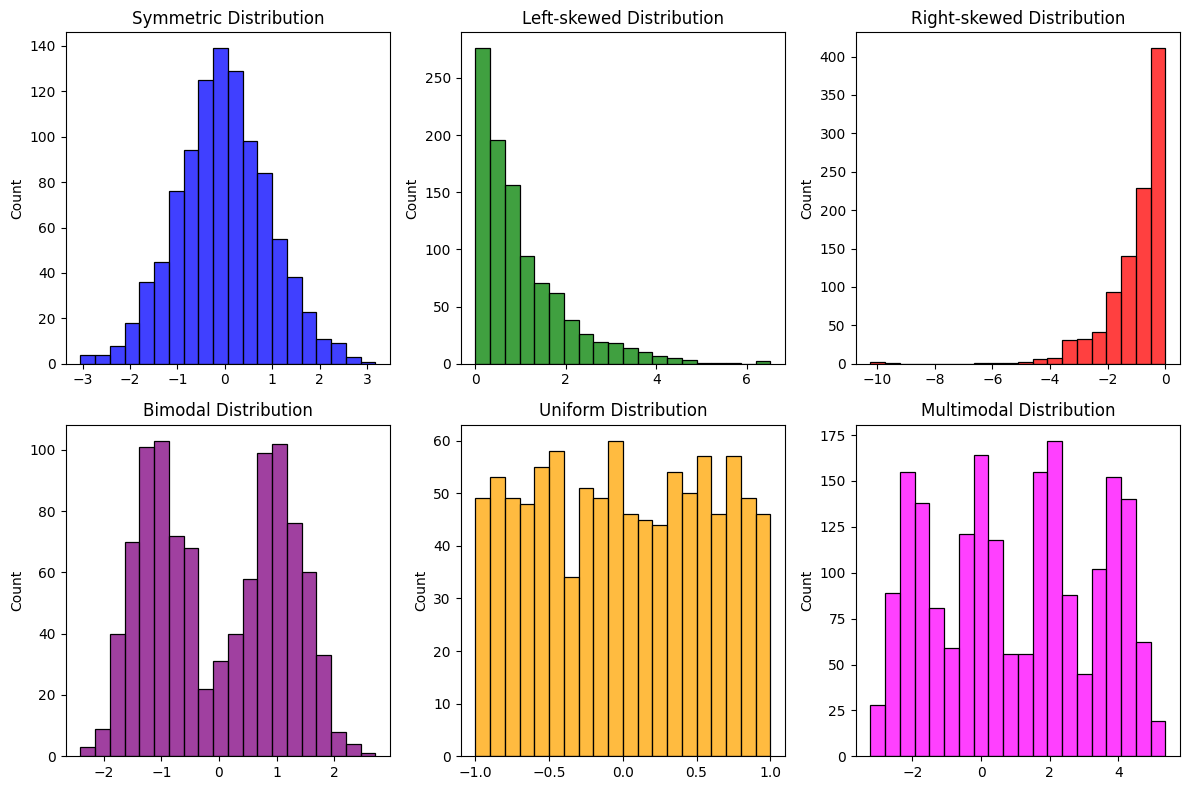

In [37]:
plt.figure(figsize=(12, 8))

# Simétrica
plt.subplot(2, 3, 1)
sns.histplot(np.random.normal(0, 1, 1000), bins=20, color="blue")
plt.title("Symmetric Distribution")

# Asimétrica a la izquierda
plt.subplot(2, 3, 2)
sns.histplot(np.random.exponential(1, 1000), bins=20, color="green")
plt.title("Left-skewed Distribution")

# Asimétrica a la derecha
plt.subplot(2, 3, 3)
sns.histplot(-np.random.exponential(1, 1000), bins=20, color="red")
plt.title("Right-skewed Distribution")

# Bimodal
plt.subplot(2, 3, 4)
sns.histplot(np.concatenate((np.random.normal(-1, 0.5, 500), np.random.normal(1, 0.5, 500))), bins=20, color="purple")
plt.title("Bimodal Distribution")

# Uniforme
plt.subplot(2, 3, 5)
sns.histplot(np.random.uniform(-1, 1, 1000), bins=20, color="orange")
plt.title("Uniform Distribution")

# Multimodal
plt.subplot(2, 3, 6)
multimodal_data = np.concatenate((
    np.random.normal(-2, 0.5, 500),
    np.random.normal(0, 0.5, 500), 
    np.random.normal(2, 0.5, 500),
    np.random.normal(4, 0.5, 500)
))
sns.histplot(multimodal_data, bins=20, color="magenta")
plt.title("Multimodal Distribution")

plt.tight_layout()
plt.show()

Comprender las diferentes formas de distribución es fundamental para interpretar y analizar adecuadamente los datos. Cada forma tiene implicaciones en términos de tendencia central, dispersión y probabilidad de ocurrencia de los valores. Al identificar la forma de la distribución, se puede obtener información valiosa sobre el comportamiento y las características subyacentes de los datos.

## Curvas de Distribución: Modelando la Densidad de Probabilidad

Además de los histogramas, las curvas de distribución son otra herramienta poderosa para modelar y visualizar la distribución subyacente de los datos. Estas curvas suavizan los datos del histograma y proporcionan una estimación de la densidad de probabilidad de manera continua.

Volviendo al ejemplo de la distribución de pesos, se puede ver cómo se compara el histograma con su curva de distribución correspondiente.

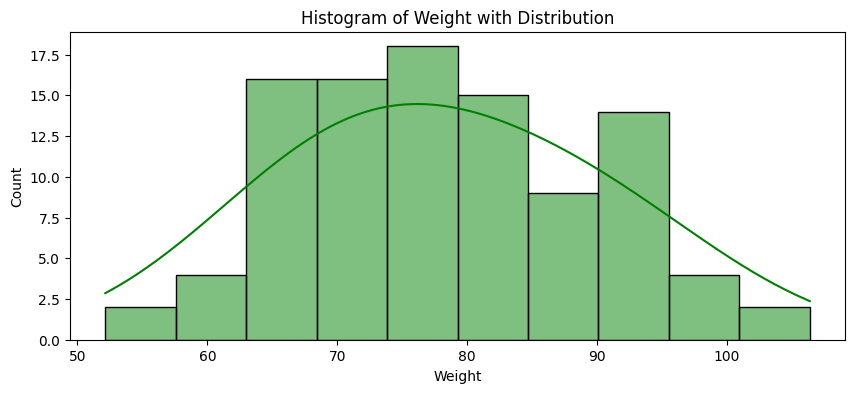

In [38]:
plt.figure(figsize=(10, 4))
histplot = sns.histplot(data['Weight'], bins=10, color="green", kde=True, kde_kws={'bw_adjust': 2})
plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Histogram of Weight with Distribution")
plt.show()

La curva de distribución brinda información similar al histograma, pero de manera más suave y continua. Indica que hay una baja probabilidad de encontrar pesos en los extremos inferior y superior, mientras que hay una mayor concentración de medidas en el rango medio.

Una ventaja de las curvas de distribución es que no están limitadas por el ancho de los intervalos del histograma. Pueden calcular la probabilidad de encontrar una medida en cualquier rango, incluso si no se tienen datos directos para algunos puntos. Esto permite hacer estimaciones y predicciones más allá de los datos observados.

Además, cuando el tiempo o los recursos son limitados, las curvas de distribución pueden ser una alternativa eficiente. Con solo una estimación de la media y la desviación estándar de los datos, se puede trazar una curva que capture la esencia de la distribución, ahorrando tiempo y esfuerzo en la recolección exhaustiva de datos.

Tanto los histogramas como las curvas de distribución son representaciones visuales de cómo se distribuyen las probabilidades de las medidas. La parte más alta del histograma o la curva indica la región donde las medidas son más probables, mientras que las partes bajas muestran donde las medidas son menos probables.

Las curvas de distribución permiten modelar y visualizar la distribución subyacente de los datos de una manera más suave y continua que los histogramas. Estas curvas brindan una estimación de la densidad de probabilidad y permiten calcular probabilidades para cualquier rango de valores, incluso si no se tienen medidas directas para algunos intervalos.

## El Papel de las Distribuciones en la Inteligencia Artificial Generativa

Hasta ahora, se han explorado las distribuciones de datos en el contexto de una sola variable. Sin embargo, el alcance de las distribuciones se extiende mucho más allá de este escenario simple. En el campo de la Inteligencia Artificial Generativa, las distribuciones desempeñan un papel fundamental en la creación de nuevos contenidos, como imágenes, textos y audios.

Imaginemos una colección de imágenes de rostros humanos. Cada imagen está compuesta por múltiples variables, como la forma de los ojos, el tamaño de la nariz y el color de la piel. Estas variables se pueden representar en un espacio latente, donde cada combinación única de valores corresponde a un rostro específico. Los modelos generativos, como los modelos de difusión, aprenden la distribución de estas variables en el espacio latente, capturando patrones y relaciones complejas entre ellas.

Una vez que el modelo comprende la distribución subyacente, puede generar nuevos rostros que no estaban presentes en el conjunto de datos original, pero que siguen las mismas características y patrones. Esto es posible gracias a la capacidad del modelo para interpolar y extrapolar a partir de la distribución aprendida, creando combinaciones de rasgos faciales que parecen auténticos y naturales.

De manera similar, en la generación de texto, los modelos de lenguaje aprenden la distribución de las palabras y las estructuras gramaticales a partir de un vasto corpus de texto. Al capturar estas distribuciones en un espacio latente, el modelo puede generar nuevas oraciones y párrafos que suenan coherentes y naturales, aunque nunca hayan sido escritos exactamente de esa manera antes.

Por ejemplo, si se le pide a un modelo de lenguaje que escriba un poema sobre la luna, el modelo utilizará la distribución aprendida de palabras y frases relacionadas con la luna para crear un poema único que capture su esencia. Aunque el modelo no tenga un poema específico sobre la luna en su conjunto de entrenamiento, puede generar uno nuevo combinando elementos de la distribución.

En el ámbito de la generación de audio, los modelos generativos aprenden la distribución de las ondas sonoras y pueden crear nuevos sonidos, melodías y voces que suenan auténticas y naturales. Un modelo que ha aprendido la distribución de los sonidos de diferentes instrumentos musicales puede generar una composición original que combine estos instrumentos, creando una pieza musical única.

Estos ejemplos destacan el poder de las distribuciones en la Inteligencia Artificial Generativa. Al comprender y modelar las distribuciones subyacentes en los datos, los modelos generativos pueden crear contenido nuevo y original que va más allá de los ejemplos específicos con los que fueron entrenados.

## Conclusión


Las distribuciones de datos desempeñan un papel fundamental en el análisis estadístico y la Inteligencia Artificial Generativa. Los histogramas y las curvas de distribución permiten visualizar y comprender la estructura subyacente de los datos, revelando patrones y características clave que a menudo permanecen ocultos en los datos sin procesar.

Los histogramas brindan una representación gráfica de la distribución de los datos, permitiendo identificar la centralidad, la dispersión y la forma de la distribución. Por otro lado, las curvas de distribución ofrecen una estimación suave y continua de la densidad de probabilidad, permitiendo calcular probabilidades para cualquier rango de valores y hacer predicciones más allá de los datos observados. Las diferentes formas de distribución, como la simétrica, asimétrica, bimodal y uniforme, brindan información valiosa sobre el comportamiento y las características subyacentes de los datos.

Pero el poder de las distribuciones no se limita al análisis de una sola variable. En el campo de la Inteligencia Artificial Generativa, las distribuciones desempeñan un papel crucial en la creación de contenido, como imágenes, textos y audios. Al comprender y modelar las distribuciones subyacentes en los datos, los modelos generativos pueden aprender patrones y relaciones complejas, y generar contenido que va más allá de los ejemplos específicos con los que fueron entrenados.